# Basic EDA

In [138]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = sns.load_dataset('geyser')


In [139]:
data.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [140]:
data.tail()

,duration,waiting,kind
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short
271,4.467,74,long


In [141]:
rows, col = data.shape
print('Rows: ', rows, '\nColumns: ', col)
print('Size: ',data.size)

Rows:  272 
Columns:  3
Size:  816


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [143]:
data.describe()

,duration,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [144]:
data.nunique()

duration    126
waiting      51
kind          2
dtype: int64

In [145]:
data.isnull().sum()

duration    0
waiting     0
kind        0
dtype: int64

# Performing  Label Encoding

In [146]:
label = LabelEncoder()
data['kind'] = label.fit_transform(data['kind'])
data.head()

,duration,waiting,kind
0,3.600,79,0
1,1.800,54,1
2,3.333,74,0
3,2.283,62,1
4,4.533,85,0


In [147]:
data.corr()

,duration,waiting,kind
duration,1.000000,0.900811,-0.932612
waiting,0.900811,1.000000,-0.907299
kind,-0.932612,-0.907299,1.000000


<AxesSubplot:>

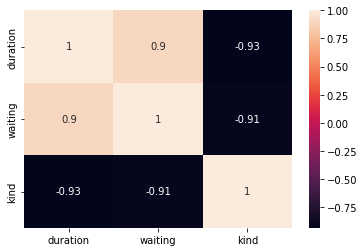

In [148]:
sns.heatmap(data.corr(), annot=True)

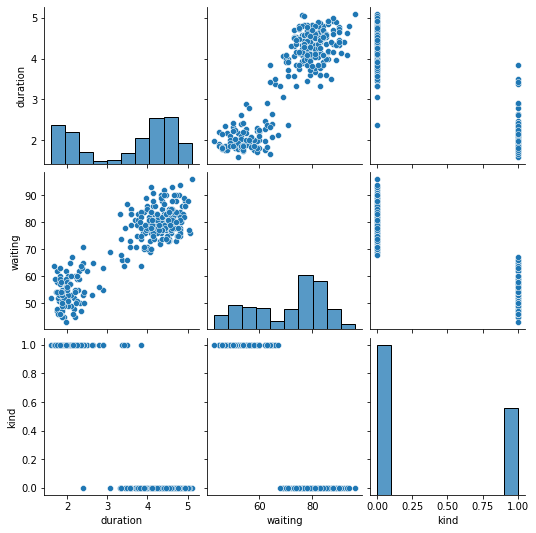

In [149]:
sns.pairplot(data)

In [150]:
pl.histogram(data, x='duration', color='kind', title = 'duration of no: of kind')

In [151]:
pl.histogram(data, x='waiting', color='kind', title = 'waiting of no: of kind')

In [152]:
pl.bar(data, x='kind', y='duration', title = 'duration of  each kind')

In [153]:
pl.area(data, x='duration', y='waiting', color='kind', title = 'duration of  each kind')

In [154]:
pl.scatter(data, x='duration', y='waiting', color='kind',  title = 'duration of  each kind')

# Multiple Linear Regession

In [155]:
x=data[['duration', 'waiting']]
y=data['kind']

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
print('Data is splited Successfully...')


Data is splited Successfully...


In [157]:
model = LinearRegression()
model.fit(x_train, y_train)
print('Model is Trained Successfully...')

Model is Trained Successfully...


In [158]:
y_pred = model.predict(x_test)
y_pred

array([-0.26382408,  0.94532799,  0.00235982,  0.82884069,  0.08117415,
        0.00685566,  0.04680872,  0.01680147, -0.15180045, -0.09628178,
        0.66040861,  0.44395374, -0.04978697,  1.10156635,  0.24752815,
        0.94962182,  1.01961431,  0.72904296,  0.02334322,  0.0721503 ,
        0.2653095 ,  0.93405622,  0.11114923,  1.02618824, -0.11749936,
        0.16554394,  1.0539154 , -0.12182537,  0.86991771, -0.0175318 ,
        0.08005019,  0.95748954, -0.04978697, -0.10530563,  0.22971462,
       -0.20169932, -0.01432975,  0.66698254,  0.94529582, -0.03646928,
       -0.07533056, -0.03329941,  0.9110269 , -0.11525144,  0.14663863,
        0.05229086, -0.02767961,  0.00126803,  0.95752172, -0.10190158,
        0.96184773,  1.03746001,  1.05956737,  0.89202507,  1.0119486 ])

In [159]:
print('Accuracy Score: ', metrics.mean_absolute_error(y_test, y_pred))

Accuracy Score:  0.10898574097857089


In [160]:
print('Training Accuraccy: ', model.score(x_train, y_train)*100)
print('Testing Accuraccy: ', model.score(x_test, y_test)*100)

Training Accuraccy:  89.47716941301715
Testing Accuraccy:  88.91577371961328


# Linear Regression

In [161]:
x=data[['duration']]
y=data[['waiting']]

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
print('Data is splited Successfully...')

Data is splited Successfully...


In [163]:
model = LinearRegression()
model.fit(x_train, y_train)
print('Model is Trained Successfully...')

Model is Trained Successfully...


# Regression line of Traing Data

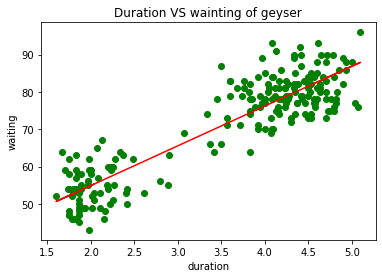

In [164]:
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, model.predict(x_train), color='red')
plt.xlabel('duration')
plt.ylabel('waiting')
plt.title('Duration VS wainting of geyser')
plt.show()

# Regression line of Testing Data

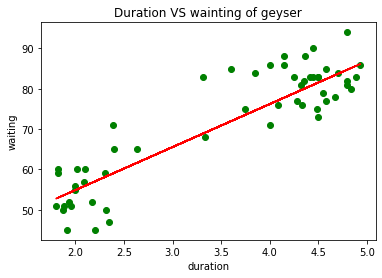

In [165]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, model.predict(x_test), color='red')
plt.xlabel('duration')
plt.ylabel('waiting')
plt.title('Duration VS wainting of geyser')
plt.show()

In [166]:
y_pred = model.predict(x_test)
y_pred

array([[84.73284668],
       [54.88396846],
       [79.93570553],
       [58.08206255],
       [79.22146452],
       [77.8036428 ],
       [76.20459576],
       [78.86967417],
       [85.61765271],
       [82.41955861],
       [58.96686859],
       [69.09416655],
       [81.53475258],
       [53.99916243],
       [73.53951734],
       [56.66424084],
       [54.35095278],
       [59.14809392],
       [79.58391518],
       [81.53475258],
       [68.92360153],
       [58.26328789],
       [74.60554871],
       [57.01603119],
       [84.73284668],
       [71.9404703 ],
       [53.46614674],
       [81.0017369 ],
       [55.94999982],
       [77.8036428 ],
       [79.7544802 ],
       [52.93313106],
       [81.53475258],
       [84.73284668],
       [76.20459576],
       [86.15066839],
       [82.06776826],
       [61.631947  ],
       [52.93313106],
       [81.0017369 ],
       [80.11693087],
       [83.31502496],
       [55.76877449],
       [83.66681531],
       [77.08940179],
       [81

In [167]:
pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.reshape(55,)})

,Actual,Predicted
0,[94],84.732847
1,[56],54.883968
2,[82],79.935706
3,[59],58.082063
4,[77],79.221465
5,[86],77.803643
6,[86],76.204596
7,[83],78.869674
8,[83],85.617653
9,[85],82.419559


In [171]:
print('Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Absolute Error 4.948911030572998


In [172]:
print('Accuracy on Training Data: ', model.score(x_train, y_train)*100)
print('Accuracy on Training Data: ', model.score(x_test, y_test)*100)


Accuracy on Training Data:  81.25470430516121
Accuracy on Training Data:  80.64187451434306


In [173]:
print('Coefficient: ', model.coef_, '\nIntercept: ', model.intercept_)

Coefficient:  [[10.66031365]] 
Intercept:  [33.56334116]
